In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('./music_genre.csv')

In [19]:
# Clean table of instance_id, artist_name, track_name, key, mode, and obtained_date
df = df.drop(['instance_id', 'artist_name', 'track_name', 'key', 'mode', 'obtained_date', 'popularity'], axis=1)

# Clean table of songs with negative duration
negative_lengths = df[df['duration_ms'] < 0].index
df.drop(negative_lengths, inplace=True)

# Clean table of songs with unknown tempo
unknown_tempo = df[df['tempo'] == '?'].index
df.drop(unknown_tempo, inplace=True)

# Clean table of songs with NaN values
df = df.dropna()

# Round tempos
def df_value_round(x):
    x = float(x)
    return round(x)

df['tempo'] = df['tempo'].apply(df_value_round)

# convert duration_ms to durastion_secs
def ms_to_s(x):
    x = float(x)
    return x / 1000

df['duration_ms'] = df['duration_ms'].apply(ms_to_s)
df = df.rename(columns={'duration_ms': 'duration_secs'})

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
features = df.drop('music_genre', axis=1)
results = df['music_genre']
normalize = MinMaxScaler()
normalize.fit(features)
normalized = normalize.fit_transform(features)
normalized_df = pd.DataFrame(normalized, columns=features.columns)
df = normalized_df
df['music_genre'] = results

# Clean table of songs with NaN values
df = df.dropna()

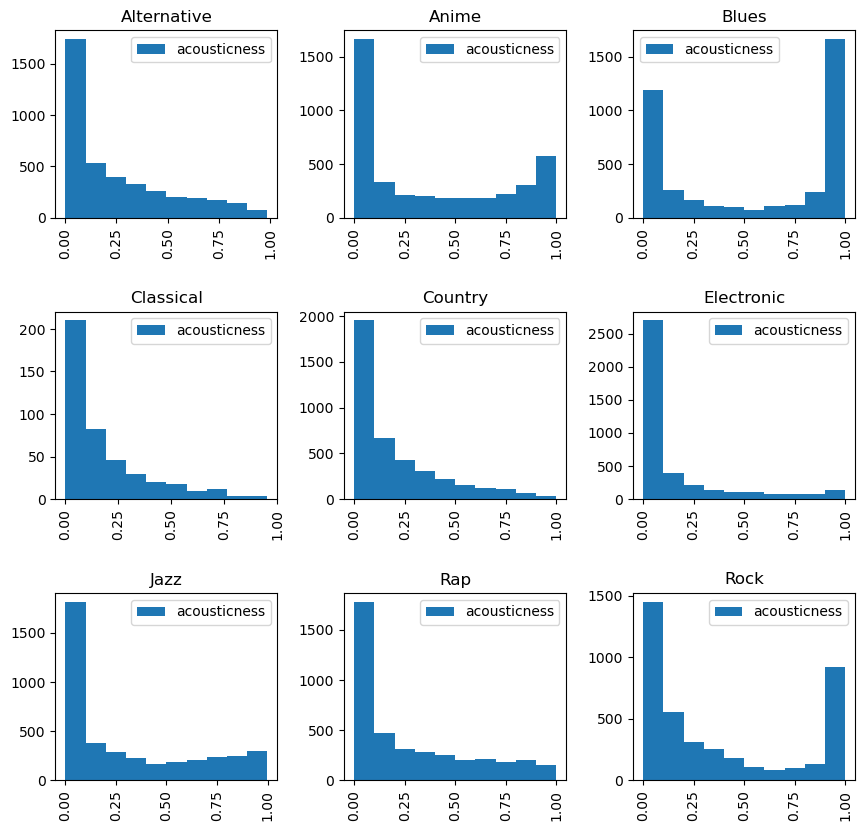

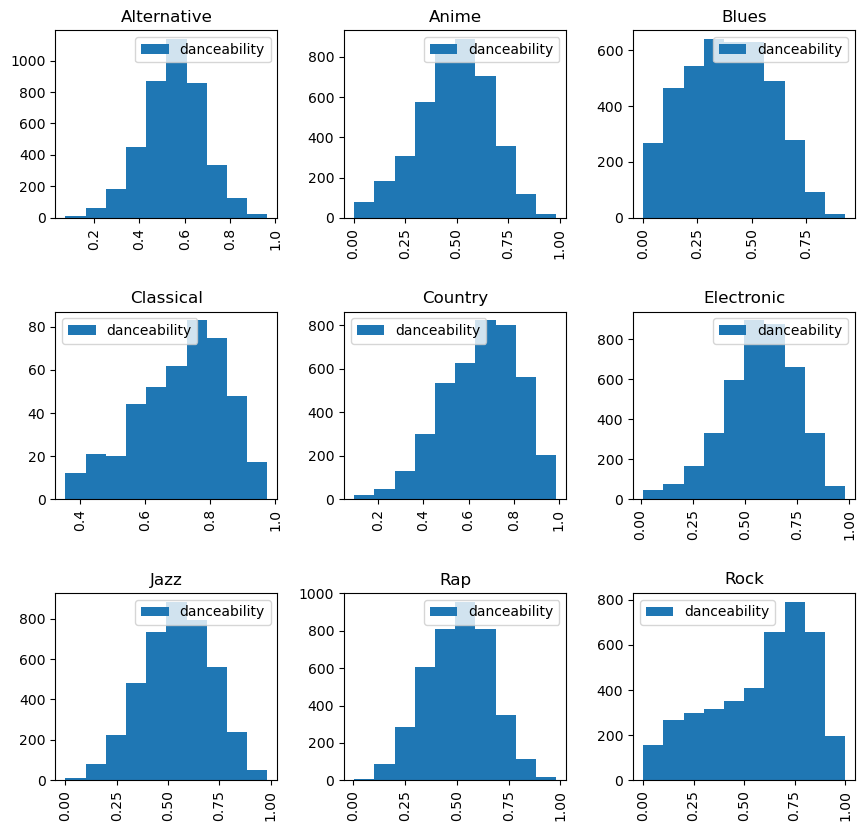

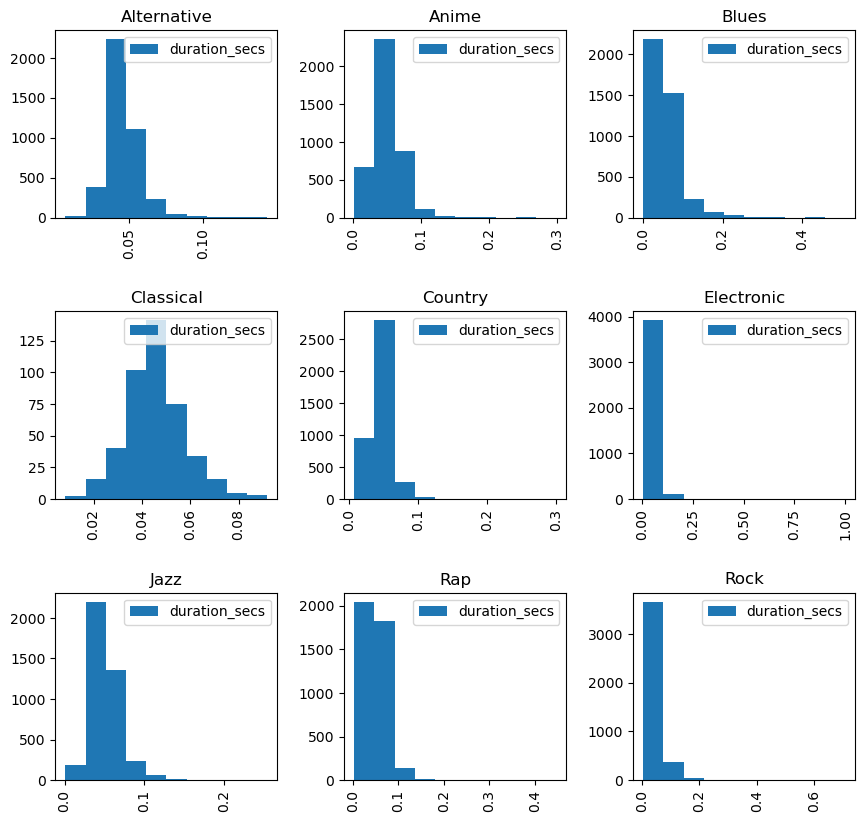

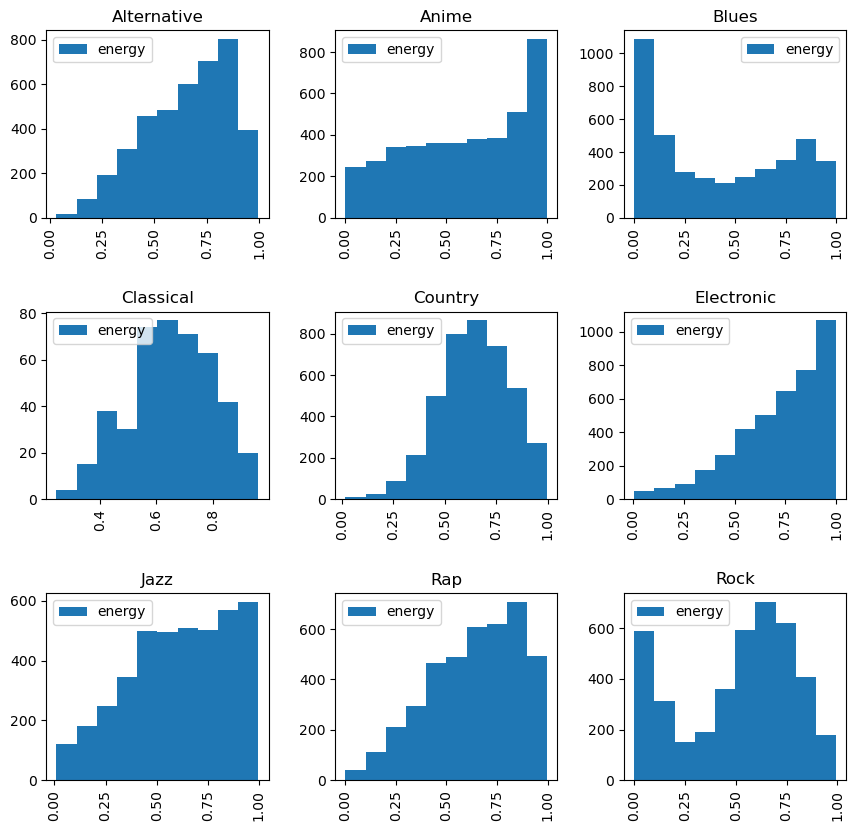

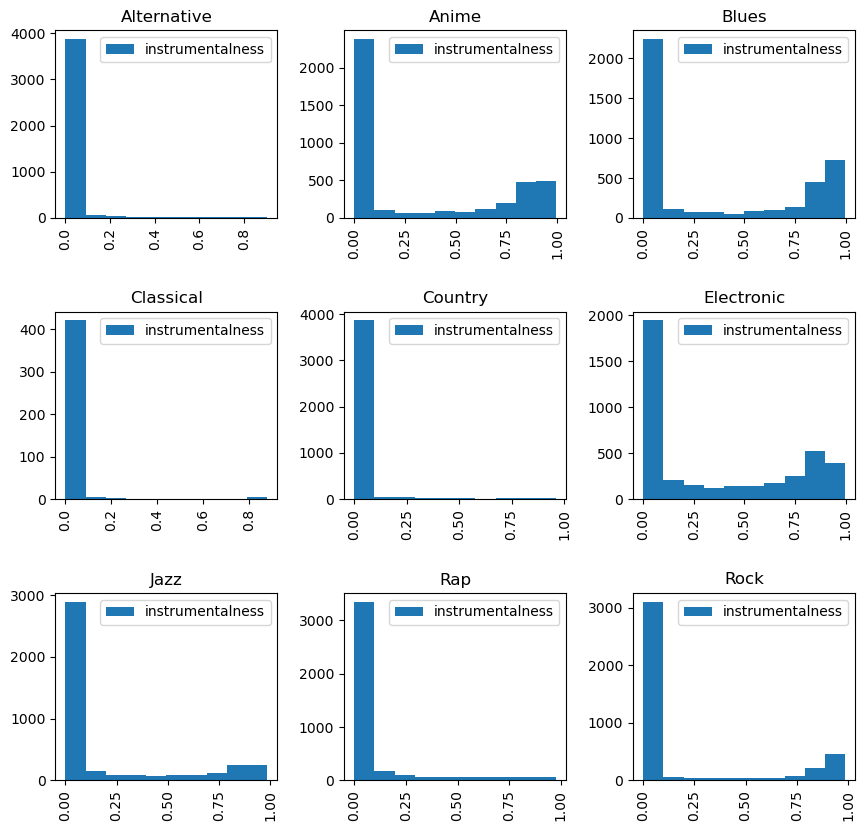

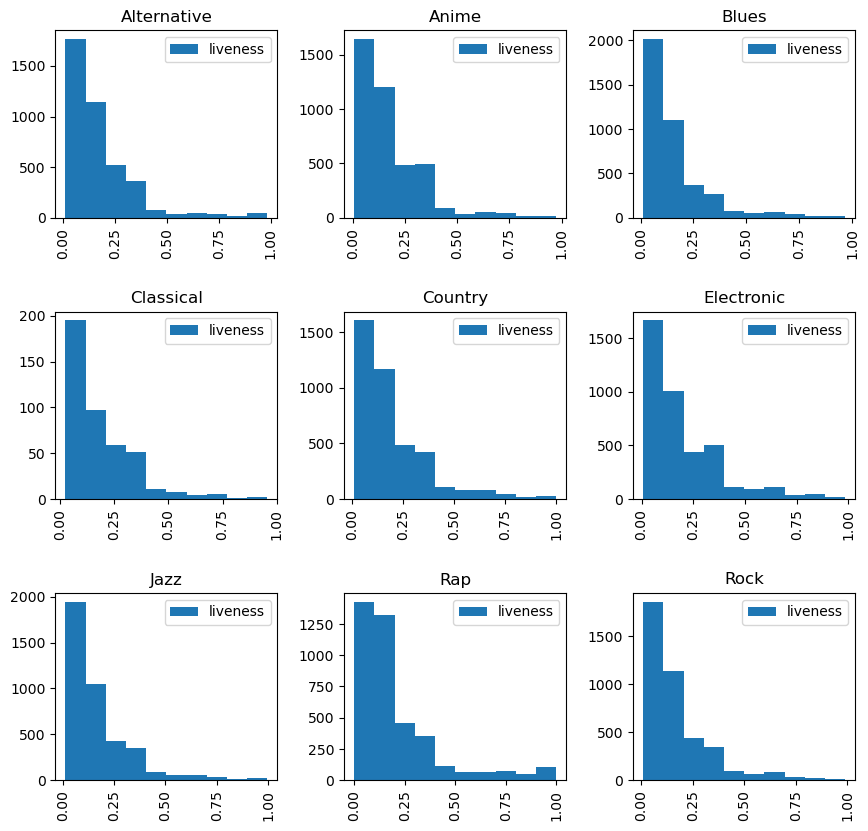

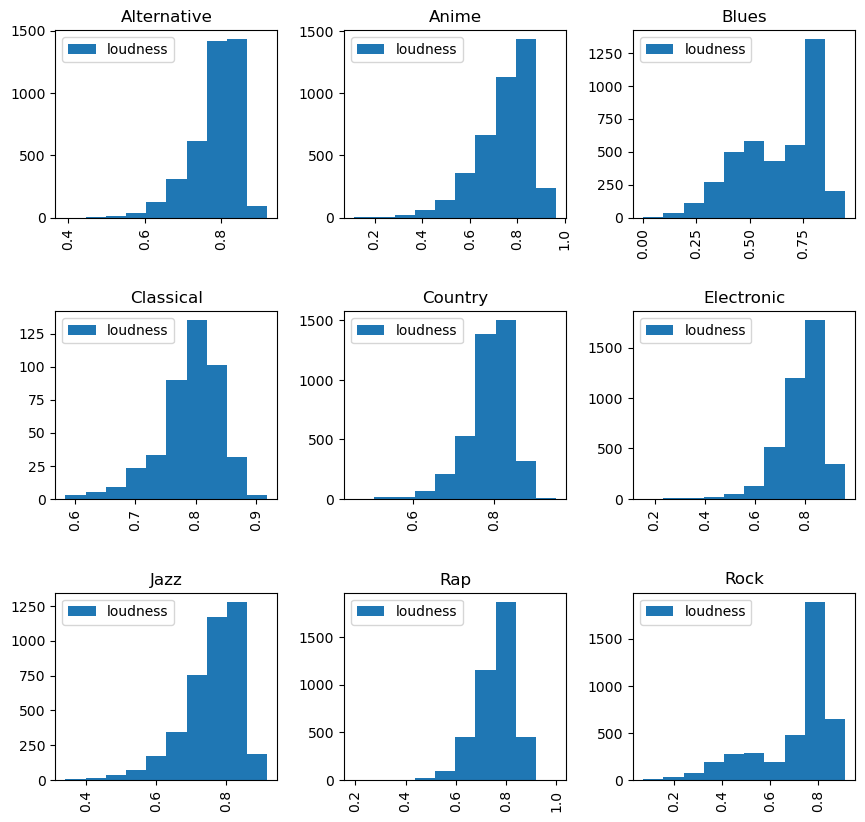

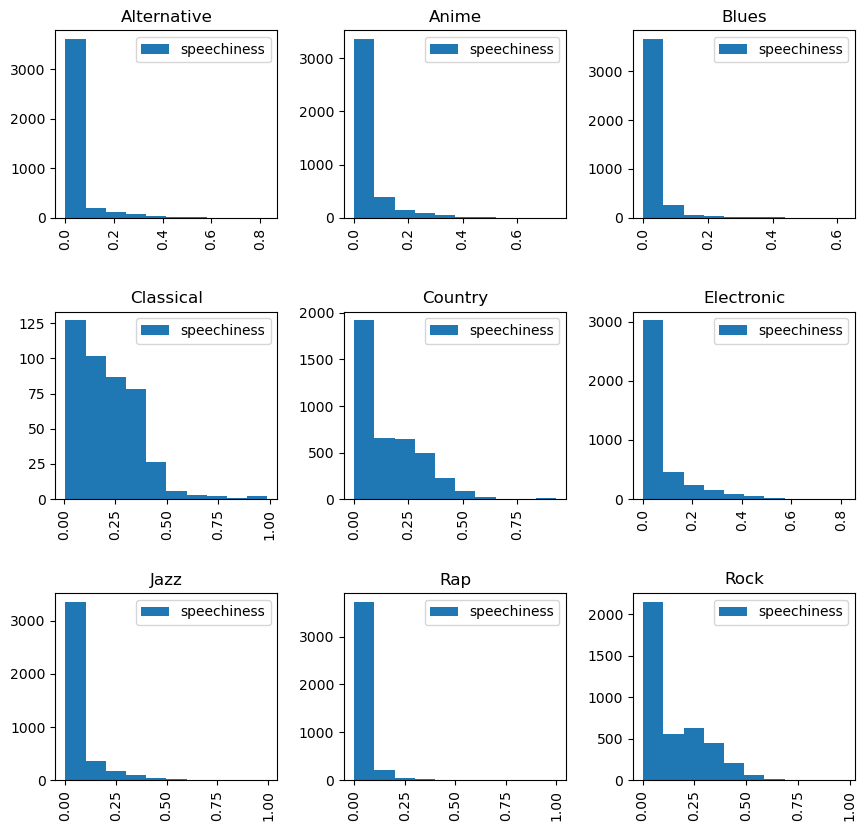

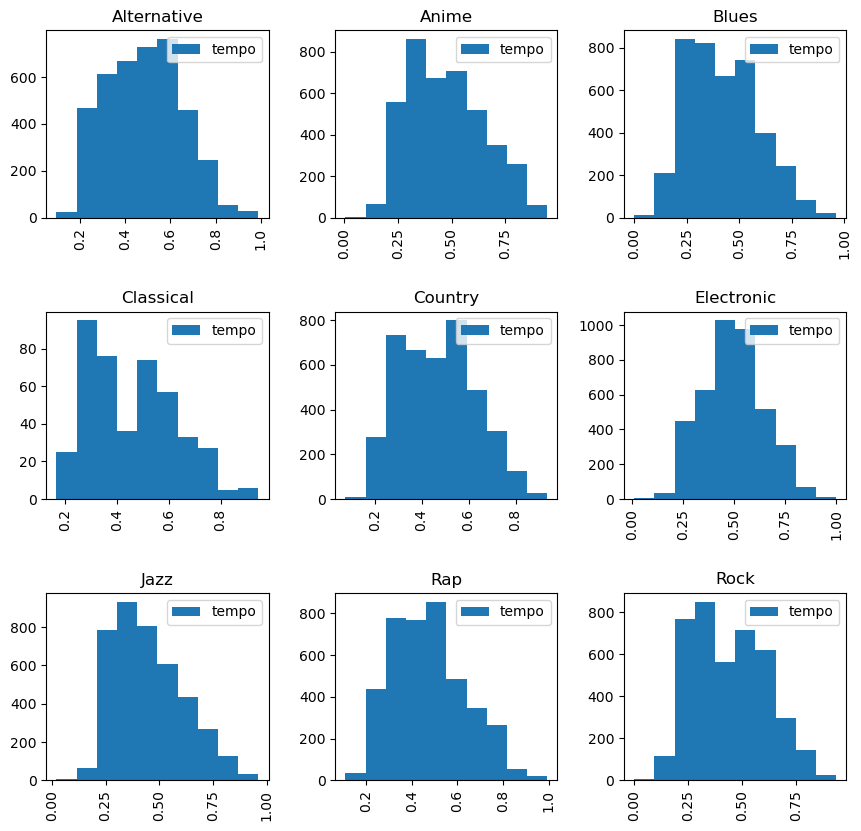

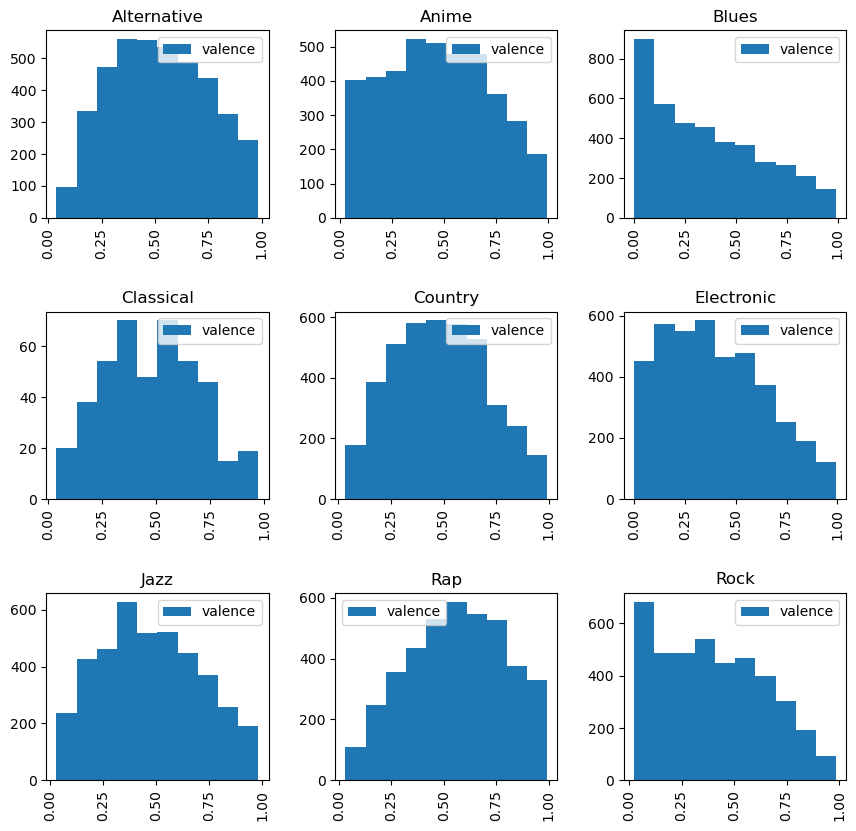

In [22]:
# histograms of each genre
training_features = df.drop(['music_genre'], axis=1)
for col in training_features:
    hist = df.hist(column=col, by=df['music_genre'], figsize=(10,10), legend=True)

In [23]:
# split data into test and train
train_df, test_df = train_test_split(df, test_size=.25, shuffle=True)

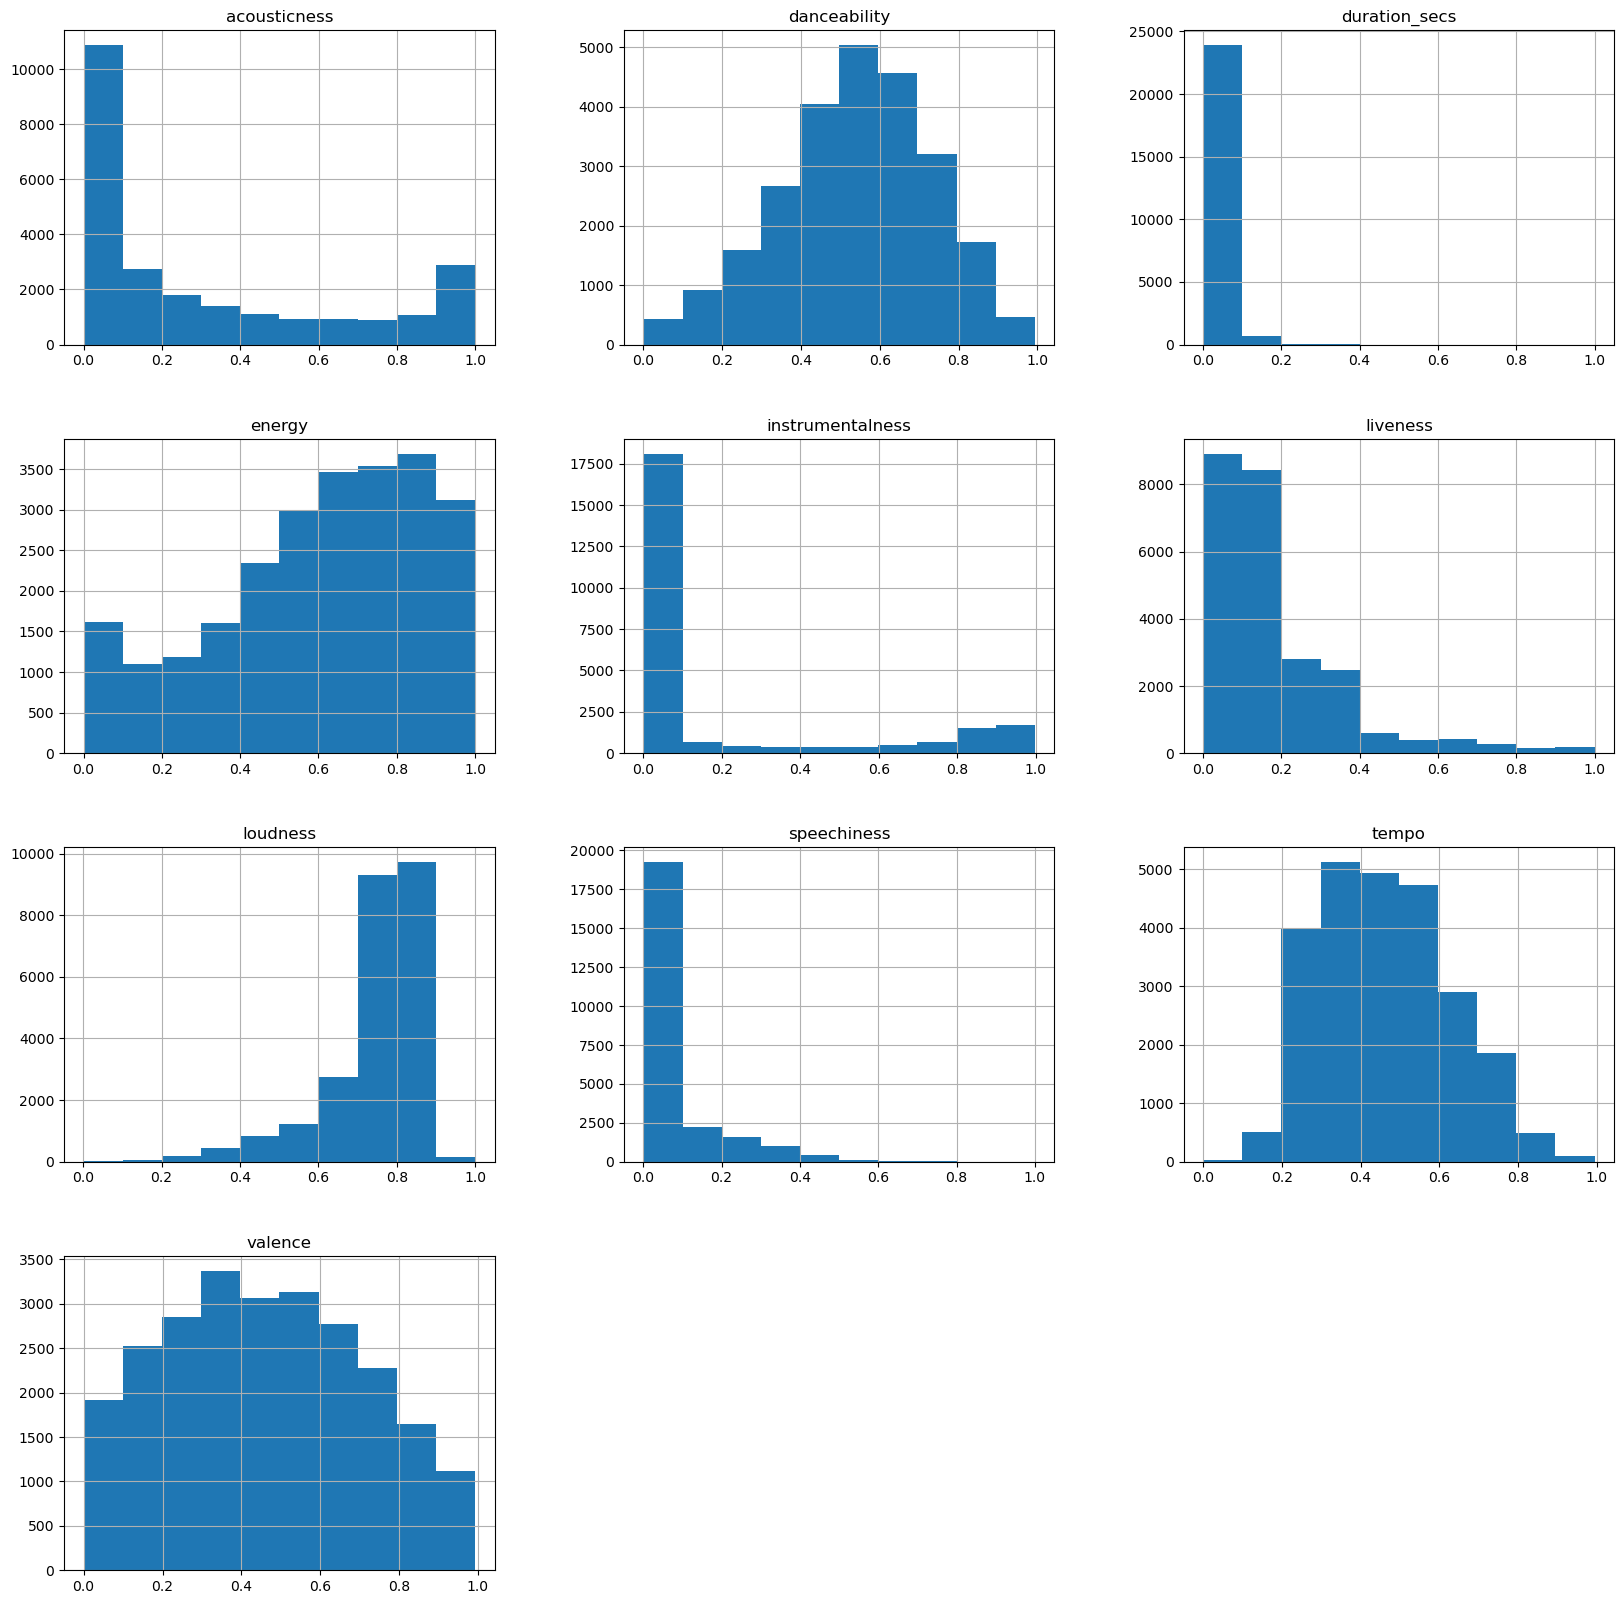

In [24]:
# histograms of training data
histograms = train_df.hist(figsize=(20, 20))

In [25]:
# Descriptive Stats - Mean
df.groupby(['music_genre']).mean()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.248420,0.548002,0.045775,0.656426,0.019539,0.182605,0.785930,0.039866,0.484911,0.522387
Anime,0.366874,0.490715,0.050983,0.594775,0.304492,0.178221,0.745463,0.050868,0.470970,0.470615
Blues,0.549442,0.388058,0.058245,0.418771,0.338381,0.166007,0.635418,0.032925,0.421902,0.363973
Classical,0.177713,0.709405,0.045659,0.651486,0.013418,0.191651,0.791698,0.211306,0.458959,0.484725
Country,0.197992,0.655095,0.046564,0.646008,0.021360,0.195551,0.788467,0.154028,0.465921,0.484060
Electronic,0.155069,0.572599,0.055152,0.726176,0.341892,0.200102,0.784178,0.076144,0.493448,0.402713
Jazz,0.303772,0.543752,0.051563,0.611899,0.184275,0.177536,0.759679,0.065359,0.448963,0.475405
Rap,0.273379,0.508266,0.051883,0.638667,0.083110,0.208942,0.760614,0.040126,0.472351,0.561954
Rock,0.384396,0.580016,0.051278,0.509167,0.186437,0.179474,0.707300,0.149604,0.438923,0.401692


In [26]:
# Descriptive Stats - Median
df.groupby(['music_genre']).median()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.145582,0.553109,0.044240,0.689443,0.000002,0.120495,0.799882,0.015549,0.478495,0.513105
Anime,0.213855,0.499136,0.050372,0.634345,0.007023,0.118476,0.769147,0.024464,0.462366,0.467742
Blues,0.706325,0.386874,0.049039,0.361856,0.020532,0.107368,0.683402,0.021529,0.403226,0.320565
Classical,0.100100,0.736075,0.044505,0.656885,0.000000,0.130593,0.799980,0.185604,0.451613,0.491431
Country,0.108434,0.671848,0.044612,0.650373,0.000000,0.127564,0.796968,0.106230,0.462366,0.480847
Electronic,0.029116,0.585492,0.050938,0.777601,0.130522,0.122515,0.801359,0.035446,0.494624,0.373992
Jazz,0.152610,0.547712,0.048623,0.630338,0.000950,0.114437,0.776777,0.027726,0.424731,0.459677
Rap,0.145582,0.514788,0.047455,0.668406,0.000391,0.123524,0.773499,0.021746,0.462366,0.568044
Rock,0.210843,0.643782,0.045999,0.572233,0.000003,0.114437,0.777358,0.086659,0.430108,0.383065


In [27]:
# Descriptive Stats - Standard Deviation
df.groupby(['music_genre']).median()

,acousticness,danceability,duration_secs,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
music_genre,,,,,,,,,,
Alternative,0.145582,0.553109,0.044240,0.689443,0.000002,0.120495,0.799882,0.015549,0.478495,0.513105
Anime,0.213855,0.499136,0.050372,0.634345,0.007023,0.118476,0.769147,0.024464,0.462366,0.467742
Blues,0.706325,0.386874,0.049039,0.361856,0.020532,0.107368,0.683402,0.021529,0.403226,0.320565
Classical,0.100100,0.736075,0.044505,0.656885,0.000000,0.130593,0.799980,0.185604,0.451613,0.491431
Country,0.108434,0.671848,0.044612,0.650373,0.000000,0.127564,0.796968,0.106230,0.462366,0.480847
Electronic,0.029116,0.585492,0.050938,0.777601,0.130522,0.122515,0.801359,0.035446,0.494624,0.373992
Jazz,0.152610,0.547712,0.048623,0.630338,0.000950,0.114437,0.776777,0.027726,0.424731,0.459677
Rap,0.145582,0.514788,0.047455,0.668406,0.000391,0.123524,0.773499,0.021746,0.462366,0.568044
Rock,0.210843,0.643782,0.045999,0.572233,0.000003,0.114437,0.777358,0.086659,0.430108,0.383065


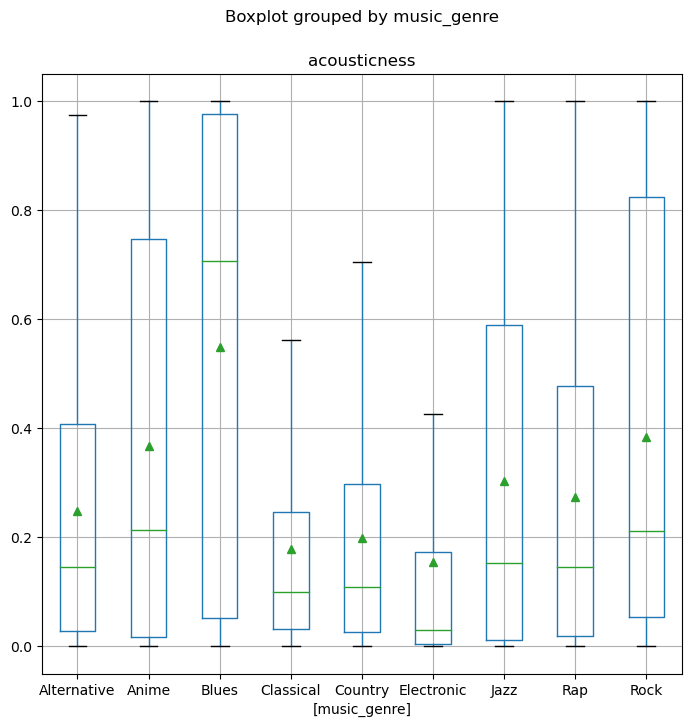

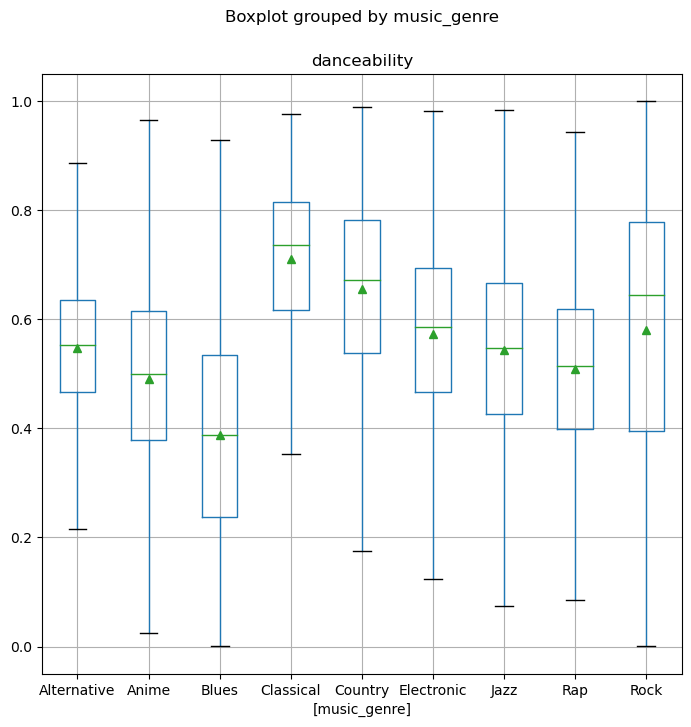

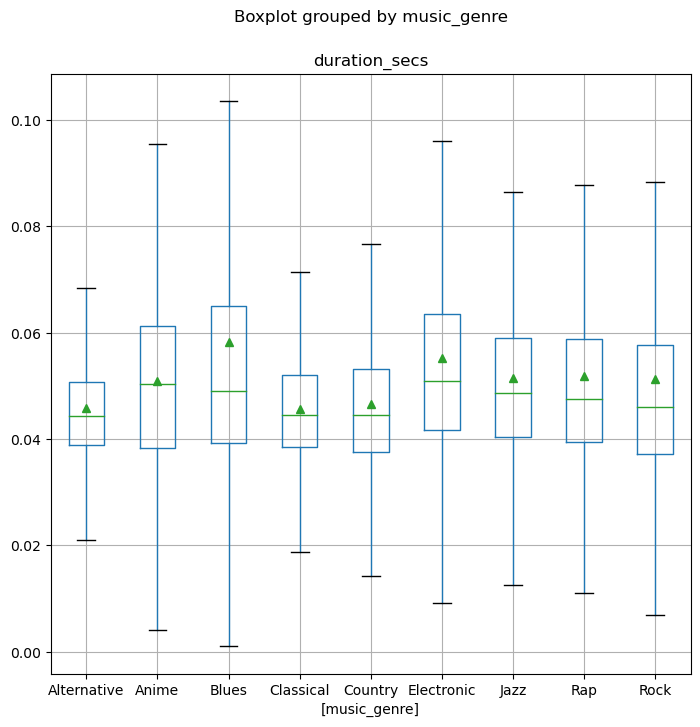

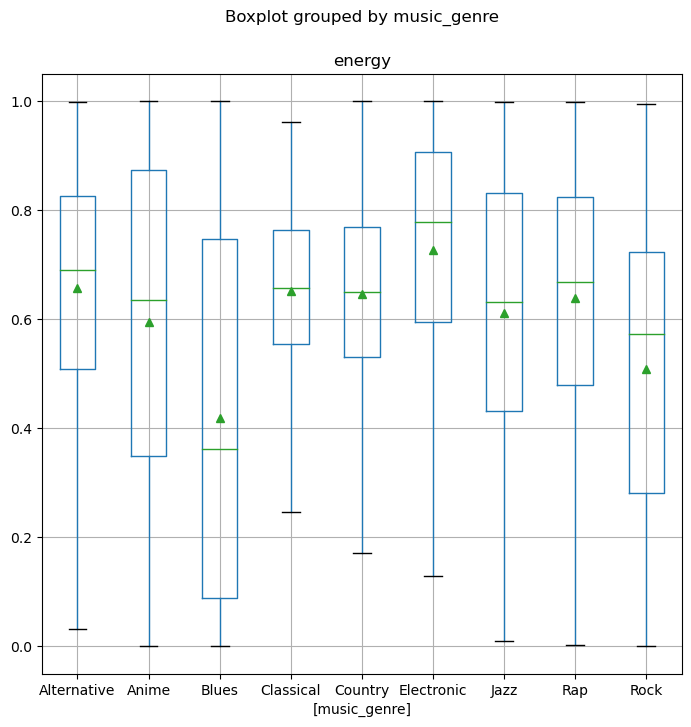

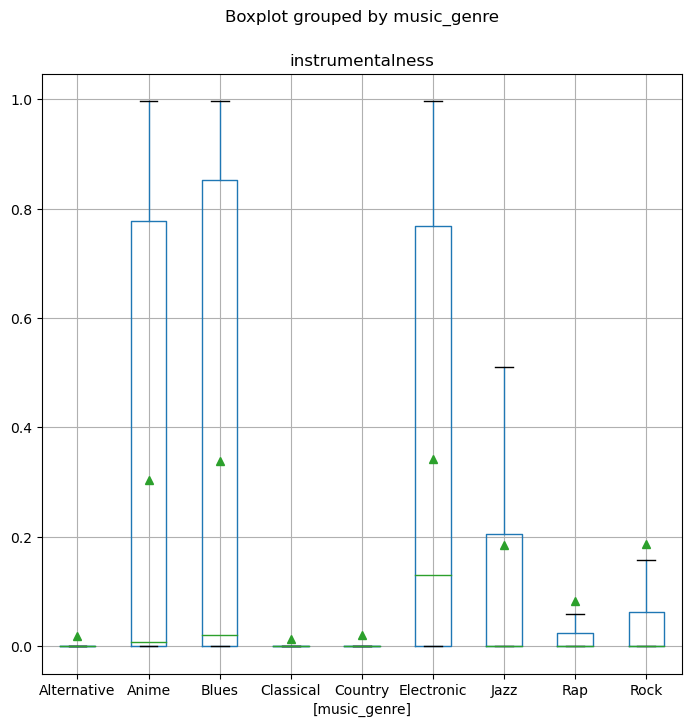

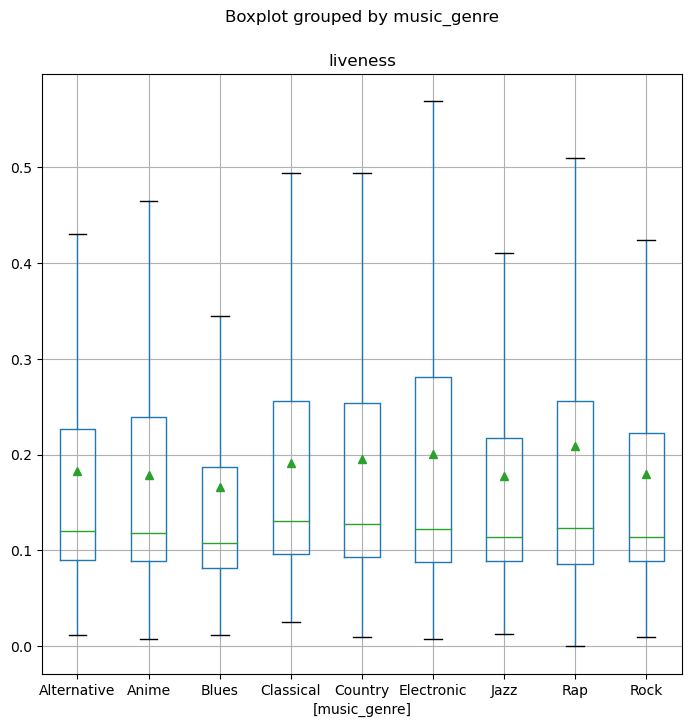

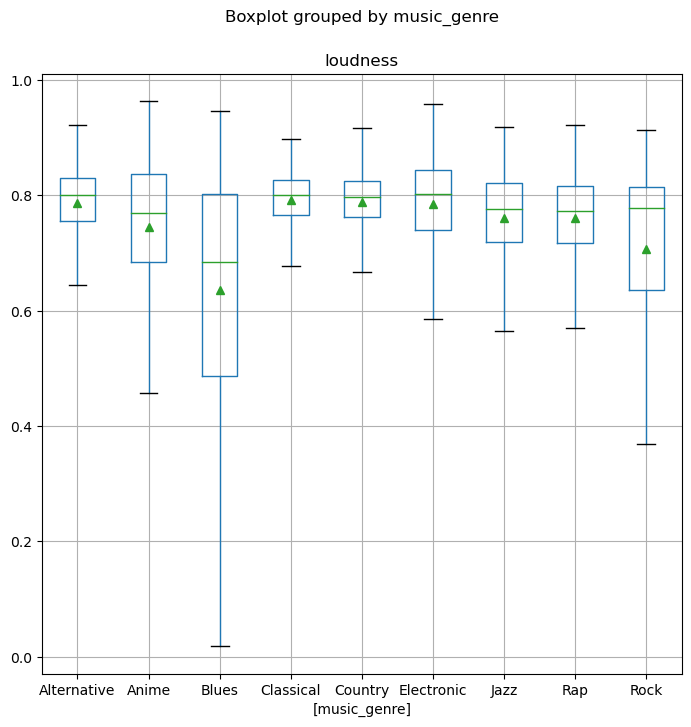

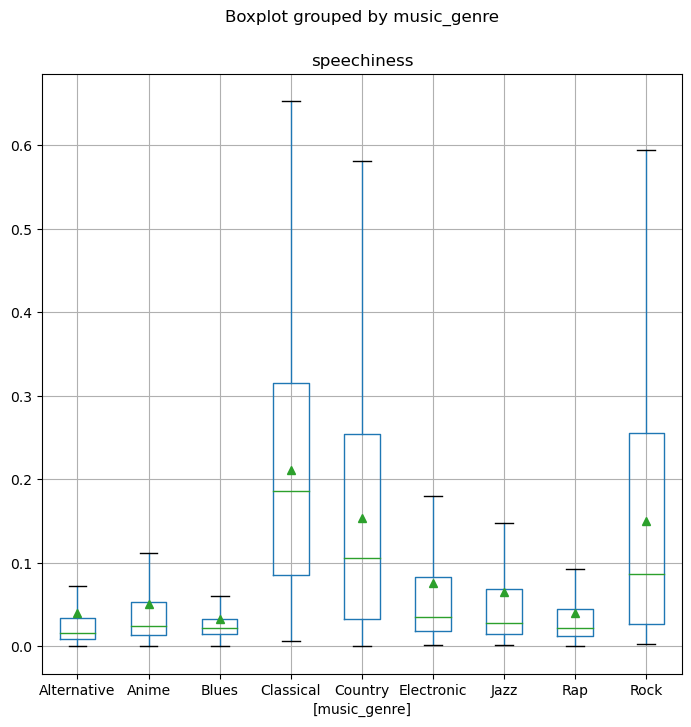

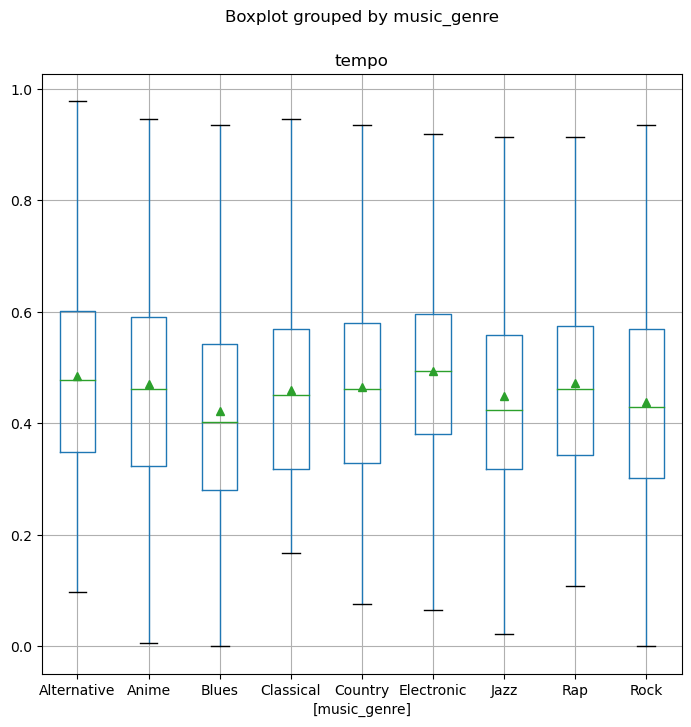

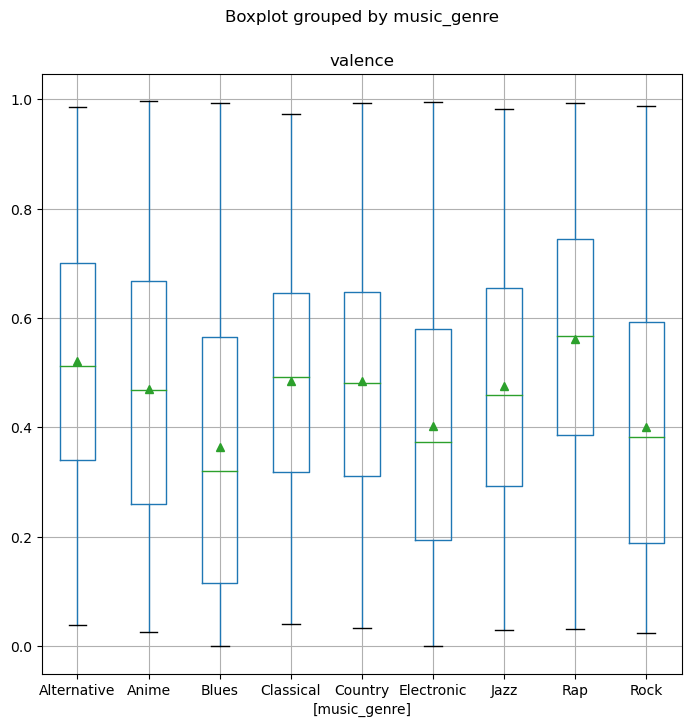

In [28]:
# Boxplots
training_features = train_df.drop(['music_genre'], axis=1)
for col in training_features:
    boxplot = df.boxplot(column=[col], by=['music_genre'], figsize=(8,8), showfliers=False, showmeans=True)

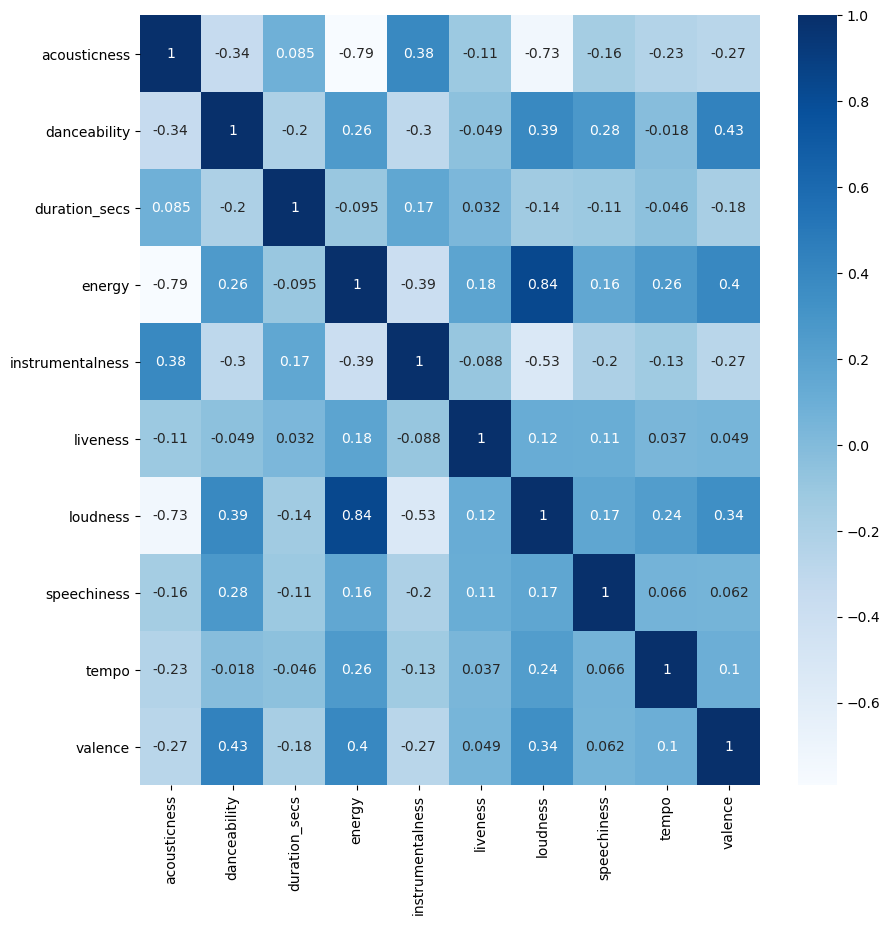

In [29]:
# Correlation Matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues)
plt.show()

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [31]:
knn_model = KNeighborsClassifier(5)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 5:')
print(metrics.classification_report(training_labels,predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 5:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))




training set when k = 5:
              precision    recall  f1-score   support

 Alternative       0.40      0.71      0.51      3070
       Anime       0.47      0.54      0.50      3016
       Blues       0.55      0.53      0.54      3002
   Classical       0.40      0.17      0.24       327
     Country       0.50      0.53      0.51      3061
  Electronic       0.63      0.54      0.58      2996
        Jazz       0.47      0.34      0.39      3035
         Rap       0.55      0.42      0.48      3087
        Rock       0.58      0.43      0.49      3066

    accuracy                           0.50     24660
   macro avg       0.50      0.47      0.47     24660
weighted avg       0.51      0.50      0.50     24660

[[2178  137  109    4  165   69  129  220   59]
 [ 476 1620  192    2   73  215  221  157   60]
 [ 555  250 1590    0   73   85  127  156  166]
 [  37   11    3   55  123   14   11    8   65]
 [ 428  161   81   25 1616   75  129  149  397]
 [ 323  386  144    5  174 161

In [41]:
knn_model = KNeighborsClassifier(25)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 25:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 25:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))


training set when k = 25:
              precision    recall  f1-score   support

 Alternative       0.32      0.63      0.43      3070
       Anime       0.38      0.37      0.37      3016
       Blues       0.49      0.45      0.47      3002
   Classical       0.00      0.00      0.00       327
     Country       0.40      0.43      0.42      3061
  Electronic       0.53      0.49      0.51      2996
        Jazz       0.33      0.21      0.26      3035
         Rap       0.40      0.39      0.39      3087
        Rock       0.45      0.30      0.36      3066

    accuracy                           0.40     24660
   macro avg       0.37      0.36      0.36     24660
weighted avg       0.41      0.40      0.40     24660

[[1920  159   72    0  185   93  195  367   79]
 [ 565 1103  267    1   89  341  310  274   66]
 [ 641  248 1346    0   59  117  164  314  113]
 [  27    2    1    0  181   14    5    9   88]
 [ 535  115   46    1 1318  118  134  268  526]
 [ 411  387  116    0  196 14

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
model = GaussianNB()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
model.fit(training_features, training_labels)
predicted = model.predict(training_features)

print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

print('testing set:')
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
predicted = model.predict(testing_features)
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.23      0.78      0.36      3070
       Anime       0.29      0.08      0.12      3016
       Blues       0.35      0.49      0.41      3002
   Classical       0.02      0.00      0.01       327
     Country       0.34      0.54      0.42      3061
  Electronic       0.49      0.30      0.37      2996
        Jazz       0.26      0.03      0.05      3035
         Rap       0.29      0.18      0.22      3087
        Rock       0.14      0.02      0.03      3066

    accuracy                           0.30     24660
   macro avg       0.27      0.27      0.22     24660
weighted avg       0.29      0.30      0.24     24660

[[2385   33  152    3  221   41   18  200   17]
 [1111  236  782    0  182  319   66  269   51]
 [1111   33 1475    0   71   83   18  183   28]
 [  63    0    1    1  250    2    1    3    6]
 [1052   29   54   21 1651   54   25  130   45]
 [ 916  153  287    2  418  909   56  206

In [35]:
from sklearn.neighbors import NearestCentroid

In [36]:
centroid_model = NearestCentroid()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
centroid_model.fit(training_features, training_labels)

predicted = centroid_model.predict(training_features)
print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = centroid_model.predict(testing_features)
print('testing set:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.25      0.45      0.32      3070
       Anime       0.30      0.04      0.07      3016
       Blues       0.31      0.52      0.39      3002
   Classical       0.06      0.59      0.11       327
     Country       0.22      0.22      0.22      3061
  Electronic       0.43      0.40      0.42      2996
        Jazz       0.23      0.01      0.03      3035
         Rap       0.34      0.28      0.31      3087
        Rock       0.12      0.08      0.09      3066

    accuracy                           0.25     24660
   macro avg       0.25      0.29      0.22     24660
weighted avg       0.27      0.25      0.23     24660

[[1371    8  294  115  331   97   26  464  364]
 [ 781  127  923   54  194  479   29  243  186]
 [ 660   14 1548   20  202  146   17  274  121]
 [  17    0    1  192   66    4    1   11   35]
 [ 400   12   88 1176  677   94    9  256  349]
 [ 471   76  326  252  445 1210   22  110